In [1]:
import os
from PIL import Image
import torch
from torch import nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision.transforms.functional import to_tensor, to_pil_image
from IPython.display import display

from clip.simple_tokenizer import SimpleTokenizer
from utils.initialize_font_data import font_dir, fox_text_four_lines, train_json_path, exclusive_attributes, gray_scale_image_file_dir, all_gray_scale_image_file_dir, fox_text
from utils.init_model import model, preprocess, my_preprocess, preprocess_for_single_character, device, convert_weights, model_name, _download, _MODELS, load
from dataset.dataset import MyDataset, PairedImageDataset, set_image_tensors
from models.lora_clip import LoRACLIP

tokenizer = SimpleTokenizer()

exclusive_attributes:  []
loading JIT archive /home/yuki/.cache/clip/ViT-B-32.pt


In [2]:
dataset = PairedImageDataset(
  font_dir=font_dir, 
  json_path=train_json_path, 
  # texts_for_font_image=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'], 
  texts_for_font_image=[fox_text], 
  char_size=300,
  preprocess=preprocess_for_single_character, 
  sample_num_each_epoch=3,
  image_num_each_pair=2,
  image_file_dir=all_gray_scale_image_file_dir,
  dump_image=True,
  use_same_text_for_pair=False,
)
set_image_tensors(dataset, preprocess=preprocess_for_single_character, sample_num=30, padding=45)
data_loader = DataLoader(dataset, batch_size=30, shuffle=True)
print(len(dataset))

load image tensors from image files ...


100%|██████████| 120/120 [00:17<00:00,  6.89it/s]

360


2


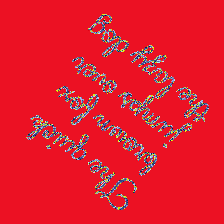

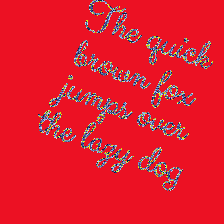

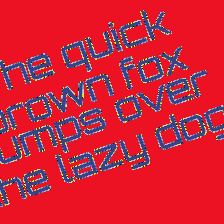

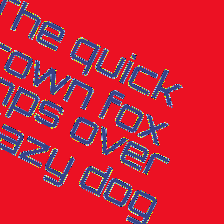

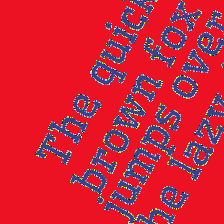

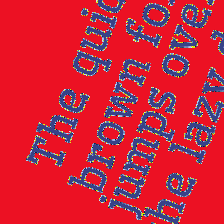

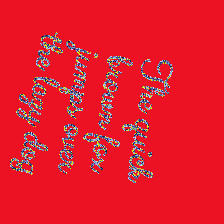

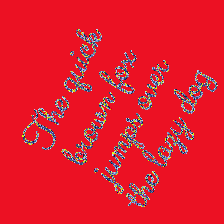

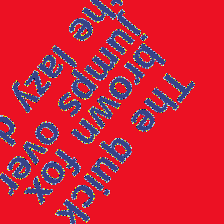

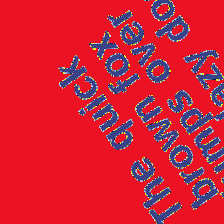

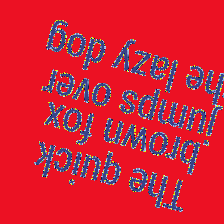

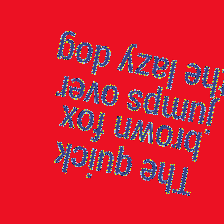

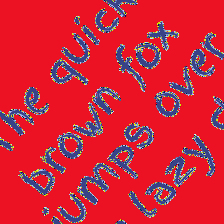

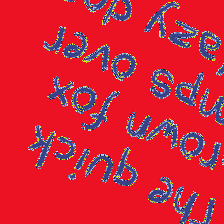

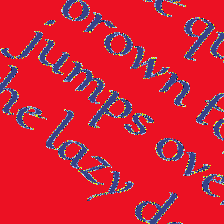

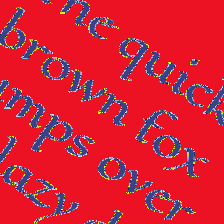

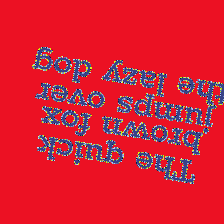

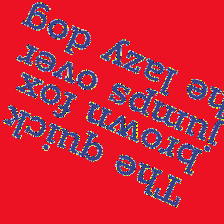

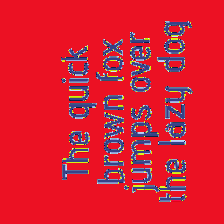

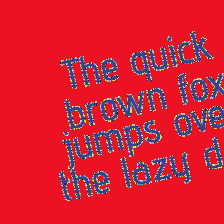

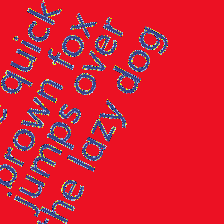

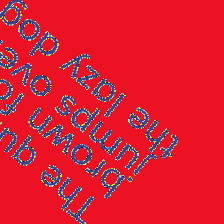

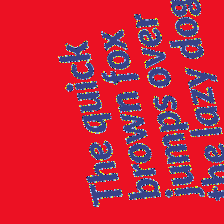

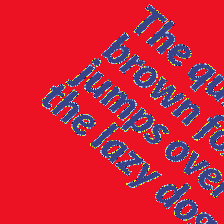

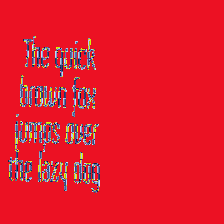

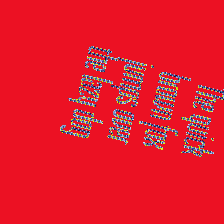

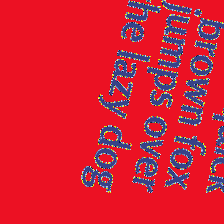

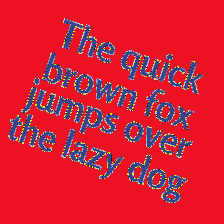

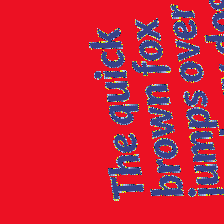

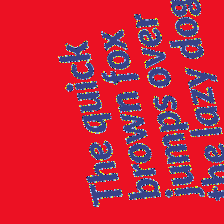

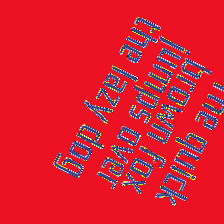

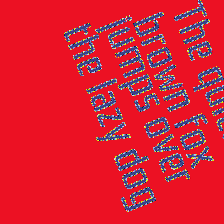

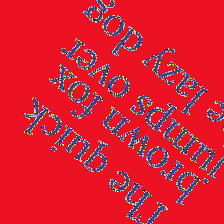

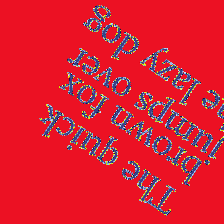

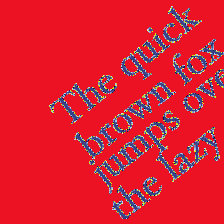

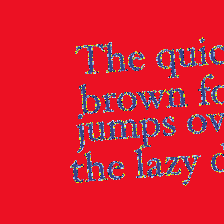

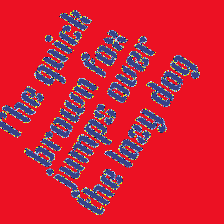

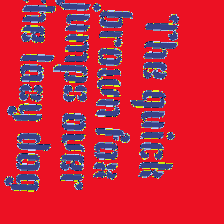

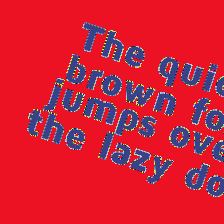

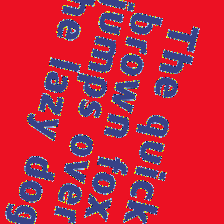

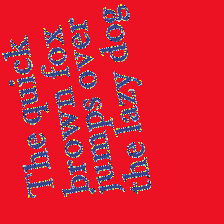

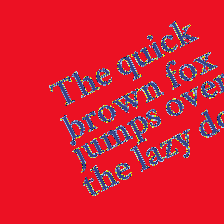

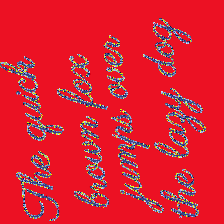

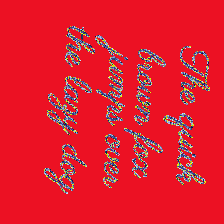

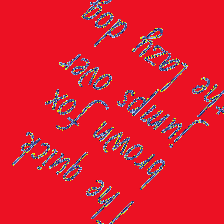

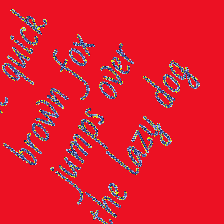

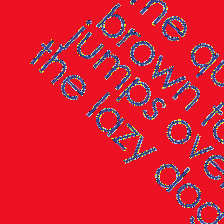

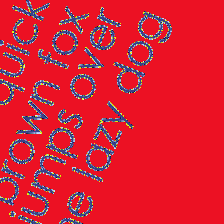

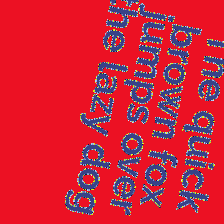

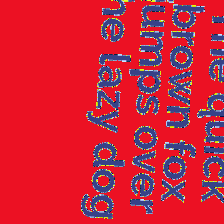

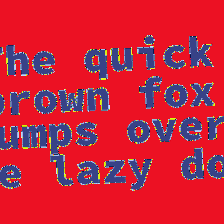

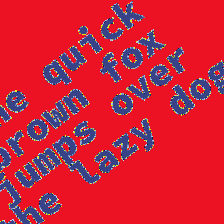

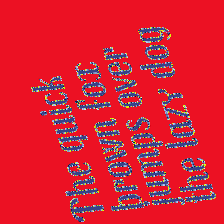

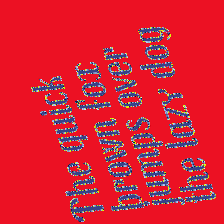

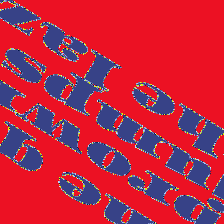

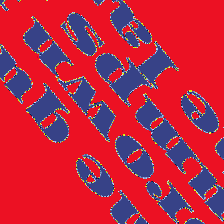

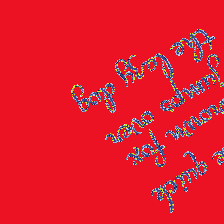

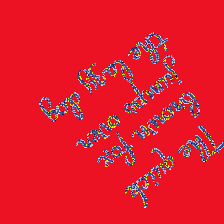

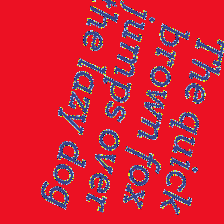

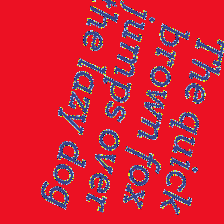

In [3]:
for batch in iter(data_loader):
  print(len(batch))
  images_1, images_2 = batch
  for image_1, image_2 in zip(images_1, images_2):
    display(to_pil_image(image_1))
    display(to_pil_image(image_2))
  break

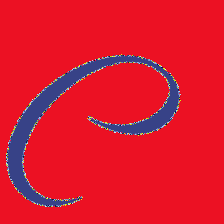

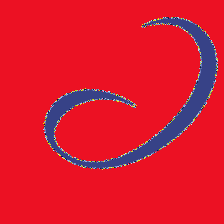

In [18]:
display(to_pil_image(image_1))
display(to_pil_image(torch.flip(image_1, [1, 2])))

In [6]:
test_dataset = PairedImageDataset(
  font_dir=font_dir, 
  json_path=train_json_path, 
  # texts_for_font_image=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'], 
  texts_for_font_image=['A', 'B', 'C'], 
  char_size=300,
  preprocess=preprocess, 
  sample_num_each_epoch=1,
  image_num_each_pair=2,
  image_file_dir=None,
  dump_image=True,
  use_same_text_for_pair=False,
  test_mode=True,
)
test_data_loader = DataLoader(test_dataset, batch_size=30, shuffle=True)
print(len(test_dataset))

360


2


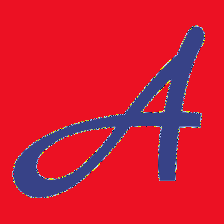

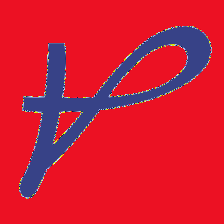

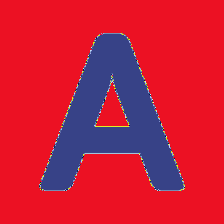

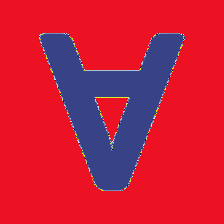

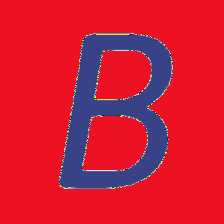

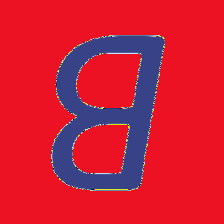

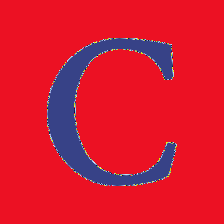

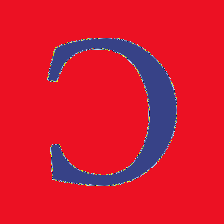

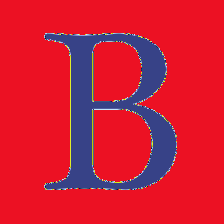

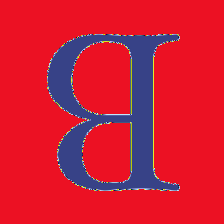

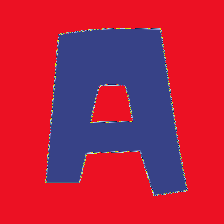

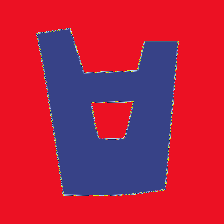

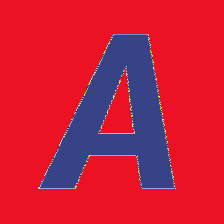

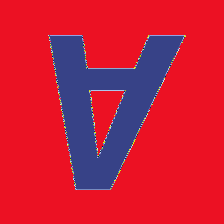

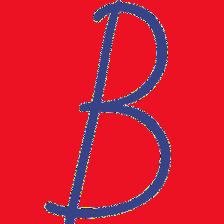

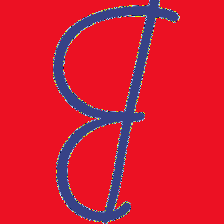

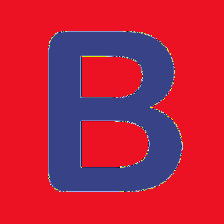

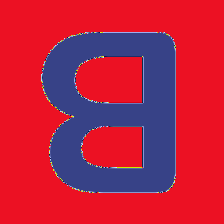

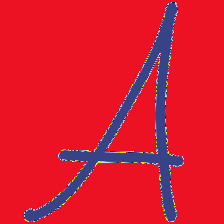

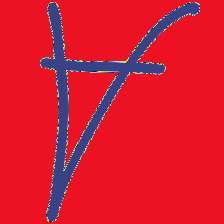

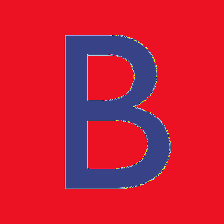

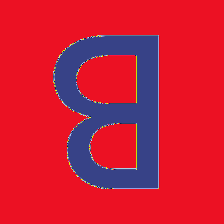

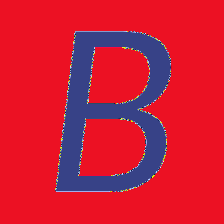

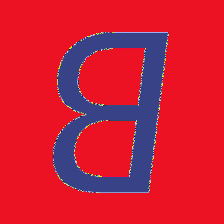

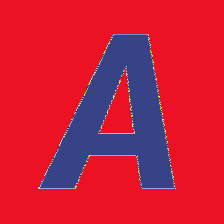

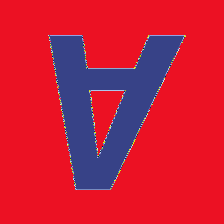

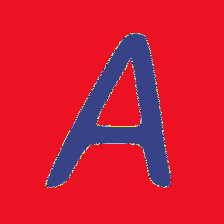

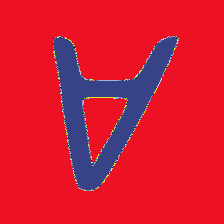

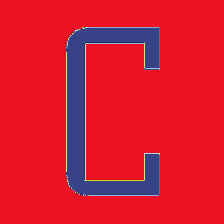

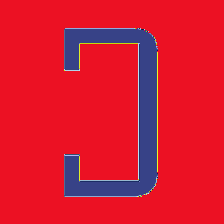

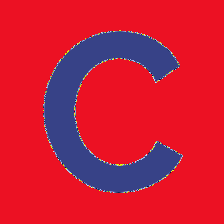

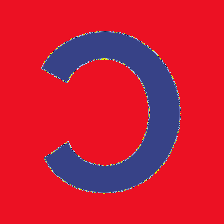

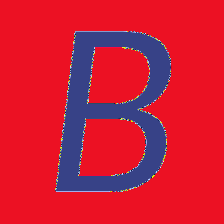

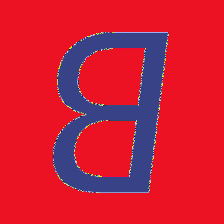

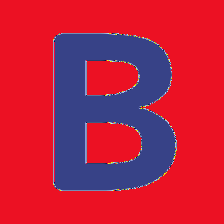

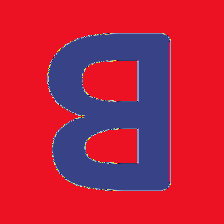

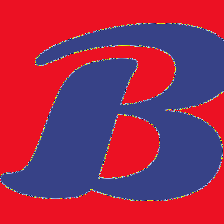

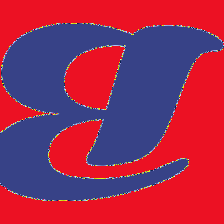

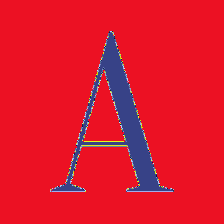

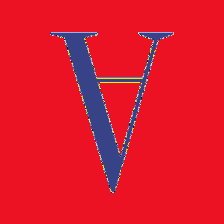

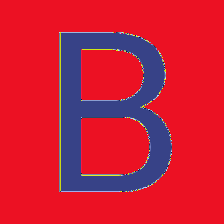

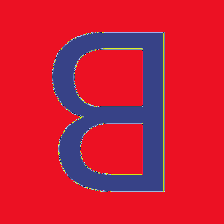

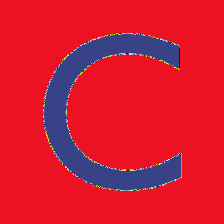

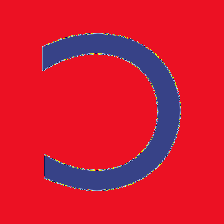

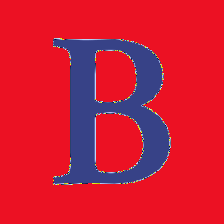

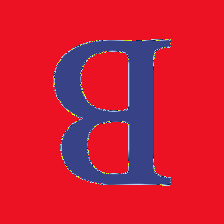

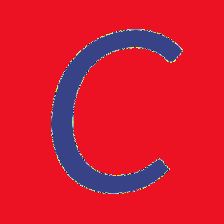

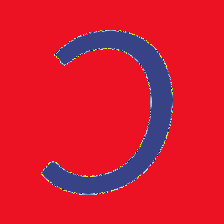

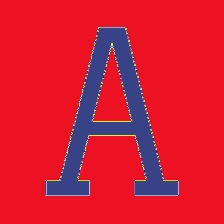

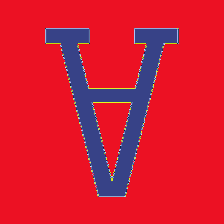

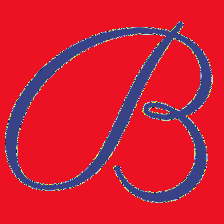

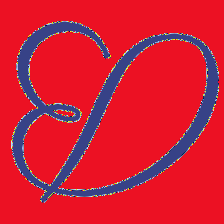

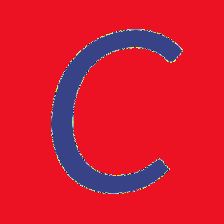

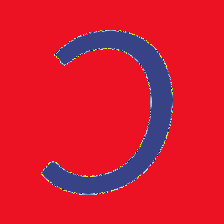

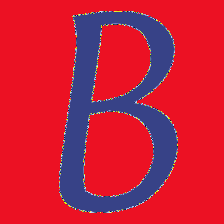

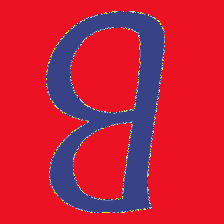

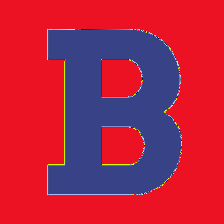

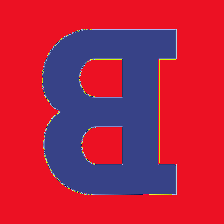

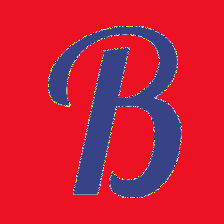

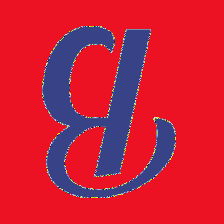

In [7]:
for batch in iter(test_data_loader):
  print(len(batch))
  images_1, images_2 = batch
  for image_1, image_2 in zip(images_1, images_2):
    display(to_pil_image(image_1))
    display(to_pil_image(image_2))
  break